# TUTO PCA étape par étape

In [1]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [2]:
data = pd.read_csv("footdata.csv")
data

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,04/08/07,Bordeaux,Lens,1,0,H,1,0,H,13,...,19,4,4,3,2,0,1,2.20,2.87,3.60
1,04/08/07,Caen,Nice,1,0,H,0,0,D,16,...,15,2,3,1,1,0,0,2.40,2.75,3.00
2,04/08/07,Lille,Lorient,0,0,D,0,0,D,6,...,19,2,2,1,1,0,0,1.72,3.00,5.00
3,04/08/07,Monaco,St Etienne,1,1,D,1,0,H,16,...,3,5,6,3,3,0,0,1.90,2.90,4.00
4,04/08/07,Paris SG,Sochaux,0,0,D,0,0,D,11,...,17,5,9,2,1,0,0,1.72,3.40,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,17/05/08,Nancy,Rennes,2,3,A,1,1,D,18,...,26,7,6,1,3,0,0,1.65,3.60,5.50
376,17/05/08,Nice,Caen,3,1,H,1,1,D,14,...,14,4,11,0,1,0,0,2.05,3.25,3.75
377,17/05/08,Sochaux,Paris SG,1,2,A,0,1,A,17,...,19,6,5,2,2,0,0,3.80,3.25,2.00
378,17/05/08,St Etienne,Monaco,4,0,H,3,0,H,20,...,12,2,2,0,1,0,0,1.72,3.40,5.25


### On ne garde que les colonnes numériques

In [14]:
from sklearn.preprocessing import StandardScaler

X = data.select_dtypes(include='number')
X



,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,1,0,1,0,13,4,4,2,21,19,4,4,3,2,0,1,2.20,2.87,3.60
1,1,0,0,0,16,14,6,4,17,15,2,3,1,1,0,0,2.40,2.75,3.00
2,0,0,0,0,6,5,2,3,26,19,2,2,1,1,0,0,1.72,3.00,5.00
3,1,1,1,0,16,19,5,6,3,3,5,6,3,3,0,0,1.90,2.90,4.00
4,0,0,0,0,11,8,10,5,13,17,5,9,2,1,0,0,1.72,3.40,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,3,1,1,18,15,4,8,21,26,7,6,1,3,0,0,1.65,3.60,5.50
376,3,1,1,1,14,15,5,7,12,14,4,11,0,1,0,0,2.05,3.25,3.75
377,1,2,0,1,17,9,4,2,16,19,6,5,2,2,0,0,3.80,3.25,2.00
378,4,0,3,0,20,3,10,0,17,12,2,2,0,1,0,0,1.72,3.40,5.25


### On centre réduit (scale) les valeurs

In [16]:
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
X_scaled

array([[-0.29464873, -0.91256856,  0.57493097, ..., -0.05069436,
        -0.83687366, -0.31510091],
       [-0.29464873, -0.91256856, -0.77367254, ...,  0.22352425,
        -1.16132051, -0.65696628],
       [-1.14287992, -0.91256856, -0.77367254, ..., -0.70881904,
        -0.48538957,  0.48258495],
       ...,
       [-0.29464873,  1.03561151, -0.77367254, ...,  2.14305455,
         0.19054138, -1.2267419 ],
       [ 2.25004484, -0.91256856,  3.27213799, ..., -0.70881904,
         0.59609994,  0.62502886],
       [ 0.55358246,  0.06152148,  0.57493097, ..., -1.14756882,
         2.75907896,  2.47679961]])

### On applique le pca

In [30]:
from sklearn.decomposition import PCA

model=PCA(n_components=19)
pca=model.fit_transform(X)
pca

array([[-3.88564008e+00,  2.48662725e+00, -6.73473205e+00, ...,
         7.00834669e-01, -3.43306166e-01, -1.79162746e-01],
       [ 2.40629857e+00, -2.05916143e+00,  1.95968456e+00, ...,
        -1.25754147e-01,  1.49647353e-02, -1.43008268e-01],
       [-9.21730063e+00, -3.72344798e+00, -1.00208209e+01, ...,
        -1.67045993e-01, -1.95373512e-01, -2.18645989e-01],
       ...,
       [ 5.23070599e-01,  3.33173139e+00, -2.87498906e-01, ...,
        -1.32322441e-01,  1.91015282e-02,  1.78724667e-01],
       [ 6.39521986e+00,  6.33088893e+00, -6.11276353e+00, ...,
        -3.01304791e-01,  6.91077823e-03,  1.10513561e-03],
       [ 5.68766925e+00,  2.40269448e+00, -2.05726601e+00, ...,
        -1.05976864e-01,  4.47673098e-02,  1.51023551e-01]])

### On stocke les componsantes principales dans un DataFrame

In [32]:
pca_df = pd.DataFrame(data=pca, columns=[f'PC{i}' for i in range(1, 20)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-3.885640,2.486627,-6.734732,1.731895,-1.780943,0.632804,-1.168903,-0.650754,0.658627,0.425632,0.462280,0.950367,0.852969,-0.308788,-0.446275,-0.209444,0.700835,-0.343306,-0.179163
1,2.406299,-2.059161,1.959685,2.324677,-2.380212,-3.378089,-0.320664,-0.321572,-0.656247,-0.964007,0.922113,-0.610292,0.558802,0.036052,0.309394,0.006631,-0.125754,0.014965,-0.143008
2,-9.217301,-3.723448,-10.020821,2.059989,-1.051698,-0.708619,0.877627,1.118927,1.915798,-1.825949,0.592074,-0.692974,0.472781,-0.219445,0.149772,-0.129433,-0.167046,-0.195374,-0.218646
3,19.541167,-8.052883,5.062788,-2.578118,0.130261,-1.054462,-0.786674,0.426822,-0.113220,3.428018,2.141282,0.524646,0.468515,-0.790583,-0.359972,0.265474,0.050587,0.028467,-0.105021
4,2.780310,-0.454471,-1.481958,-4.032030,-2.974788,5.182164,0.743549,-3.353391,0.594253,-2.408588,3.483765,-0.187369,0.324475,-0.156764,-0.288061,-0.061304,-0.022282,-0.126305,0.149591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,-7.035670,2.762942,8.286979,1.056662,0.893844,1.859145,-0.573809,1.547531,3.149405,0.300031,-1.725469,-0.624870,-0.020547,-0.308240,0.038271,0.140584,-0.140299,-0.156451,0.199672
376,5.881614,-4.994768,4.488057,-2.838572,-2.976808,3.537222,-2.572552,-0.768483,1.034163,-0.560961,-1.726275,-0.560733,0.609977,-0.190224,0.529050,-0.666365,-0.005195,-0.094894,0.205481
377,0.523071,3.331731,-0.287499,0.147975,0.406322,-0.161463,-3.303696,-0.980828,-0.619214,0.671152,-0.535032,0.856026,-1.277386,0.889811,-0.091347,0.243639,-0.132322,0.019102,0.178725
378,6.395220,6.330889,-6.112764,5.203906,-6.756285,-1.209169,2.732742,-1.860271,-0.604691,-0.633768,-1.633196,-0.872474,0.039635,-0.534806,-0.824575,-0.014992,-0.301305,0.006911,0.001105


### Afficher l'évolution de la variance en fonction du nombre de composantes principales

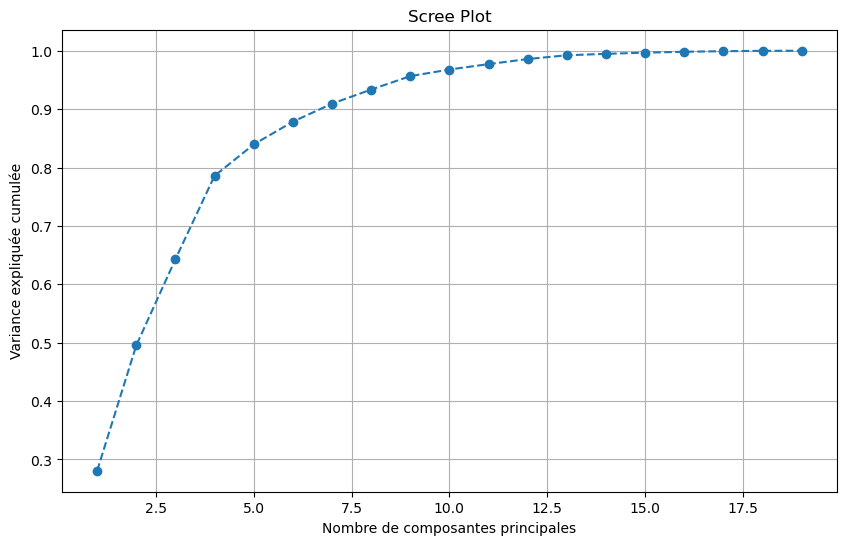

In [33]:
# Visualiser la variance expliquée
explained_variance_ratio = model.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Afficher le scree plot pour décider du nombre de composantes principales à conserver
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

### Avec 2 composantes principales, on représente seulement 50% des données. 
### Les données, la forme du dataset n'est pas adaptée au PCA

# Testons de trier par équipes

In [47]:
data2=data.groupby('HomeTeam').mean()
data2

C:\Users\Nawfel\AppData\Local\Temp\ipykernel_11960\2007637648.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2=data.groupby('HomeTeam').mean()


,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
HomeTeam,,,,,,,,,,,,,,,,,,,
Auxerre,1.052632,0.894737,0.421053,0.368421,12.315789,10.526316,4.000000,3.631579,16.263158,16.157895,5.789474,5.157895,1.631579,1.421053,0.105263,0.052632,2.412105,3.125789,3.817368
Bordeaux,2.000000,0.894737,0.894737,0.421053,12.894737,9.947368,4.473684,3.052632,18.368421,21.105263,4.578947,4.315789,1.578947,2.263158,0.052632,0.263158,1.844211,3.374737,5.382105
Caen,1.631579,1.000000,0.473684,0.473684,14.263158,13.210526,5.315789,4.000000,17.789474,18.473684,5.894737,3.684211,1.473684,1.894737,0.000000,0.210526,2.630000,2.984211,3.052105
Le Mans,1.210526,0.842105,0.578947,0.631579,13.947368,10.263158,4.263158,3.157895,18.000000,18.631579,4.578947,3.368421,1.263158,1.684211,0.157895,0.105263,2.285263,3.087895,3.631579
Lens,1.368421,1.157895,0.368421,0.421053,14.052632,11.631579,4.473684,3.894737,15.631579,18.789474,6.210526,4.368421,1.263158,1.789474,0.000000,0.105263,2.172632,3.166842,4.106316
Lille,1.526316,0.947368,1.000000,0.631579,15.052632,9.736842,5.526316,2.842105,18.210526,19.894737,5.368421,3.947368,1.473684,1.947368,0.157895,0.157895,2.094211,3.089474,4.050526
Lorient,0.947368,0.631579,0.473684,0.210526,12.368421,11.105263,3.578947,3.210526,13.368421,17.000000,5.052632,5.842105,0.789474,1.894737,0.000000,0.000000,2.468947,3.053684,3.436316
Lyon,2.315789,0.842105,0.947368,0.526316,14.052632,11.421053,5.842105,3.789474,15.473684,16.947368,4.789474,5.578947,1.578947,1.947368,0.052632,0.000000,1.431053,4.088421,8.815789
Marseille,1.789474,1.105263,1.000000,0.526316,16.157895,11.421053,5.526316,4.263158,15.315789,18.157895,5.736842,4.000000,1.105263,1.947368,0.052632,0.052632,1.780526,3.513158,5.557895


In [36]:
data2.shape

(20, 19)

## Tout pareil avec ce dataset et comparons les PCA

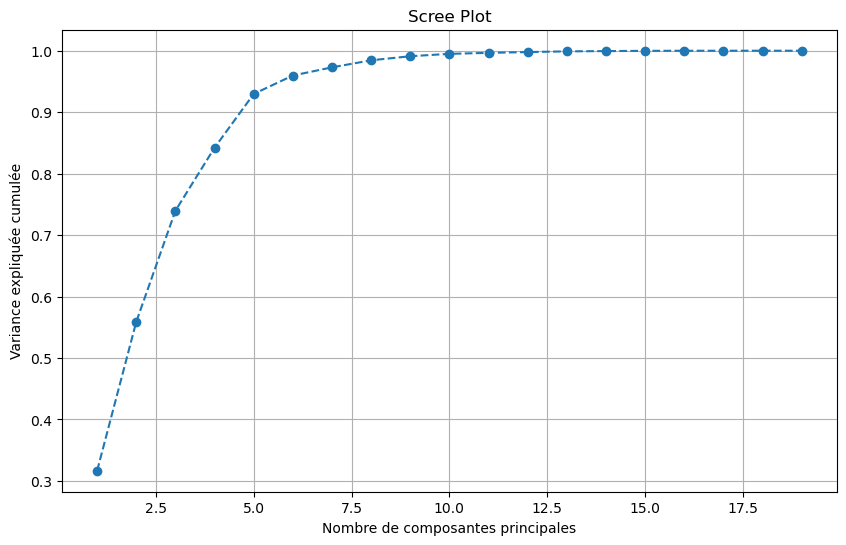

In [42]:
X2 = data2.select_dtypes(include='number')
std_scale2 = StandardScaler().fit(X2)
X2_scaled = std_scale2.transform(X2)

model2=PCA(n_components=19)
pca2=model2.fit_transform(X2)

pca2_df = pd.DataFrame(data=pca2, columns=[f'PC{i}' for i in range(1, 20)])

# Visualiser la variance expliquée
explained_variance_ratio2 = model2.explained_variance_ratio_
cumulative_variance_ratio2 = explained_variance_ratio2.cumsum()

# Afficher le scree plot pour décider du nombre de composantes principales à conserver
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio2) + 1), cumulative_variance_ratio2, marker='o', linestyle='--')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# 55% des données représentées avec 2 CP. MITEUX...
## On va essayer de drop des colonnes redondantes ou non pertinentes

In [43]:
data2

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
HomeTeam,,,,,,,,,,,,,,,,,,,
Auxerre,1.052632,0.894737,0.421053,0.368421,12.315789,10.526316,4.000000,3.631579,16.263158,16.157895,5.789474,5.157895,1.631579,1.421053,0.105263,0.052632,2.412105,3.125789,3.817368
Bordeaux,2.000000,0.894737,0.894737,0.421053,12.894737,9.947368,4.473684,3.052632,18.368421,21.105263,4.578947,4.315789,1.578947,2.263158,0.052632,0.263158,1.844211,3.374737,5.382105
Caen,1.631579,1.000000,0.473684,0.473684,14.263158,13.210526,5.315789,4.000000,17.789474,18.473684,5.894737,3.684211,1.473684,1.894737,0.000000,0.210526,2.630000,2.984211,3.052105
Le Mans,1.210526,0.842105,0.578947,0.631579,13.947368,10.263158,4.263158,3.157895,18.000000,18.631579,4.578947,3.368421,1.263158,1.684211,0.157895,0.105263,2.285263,3.087895,3.631579
Lens,1.368421,1.157895,0.368421,0.421053,14.052632,11.631579,4.473684,3.894737,15.631579,18.789474,6.210526,4.368421,1.263158,1.789474,0.000000,0.105263,2.172632,3.166842,4.106316
Lille,1.526316,0.947368,1.000000,0.631579,15.052632,9.736842,5.526316,2.842105,18.210526,19.894737,5.368421,3.947368,1.473684,1.947368,0.157895,0.157895,2.094211,3.089474,4.050526
Lorient,0.947368,0.631579,0.473684,0.210526,12.368421,11.105263,3.578947,3.210526,13.368421,17.000000,5.052632,5.842105,0.789474,1.894737,0.000000,0.000000,2.468947,3.053684,3.436316
Lyon,2.315789,0.842105,0.947368,0.526316,14.052632,11.421053,5.842105,3.789474,15.473684,16.947368,4.789474,5.578947,1.578947,1.947368,0.052632,0.000000,1.431053,4.088421,8.815789
Marseille,1.789474,1.105263,1.000000,0.526316,16.157895,11.421053,5.526316,4.263158,15.315789,18.157895,5.736842,4.000000,1.105263,1.947368,0.052632,0.052632,1.780526,3.513158,5.557895


In [48]:
data3=data2.drop(['HTHG','HTAG','HS','AS','HF','AF','HR','AR','HY','AY'],axis=1)
data3

,FTHG,FTAG,HST,AST,HC,AC,B365H,B365D,B365A
HomeTeam,,,,,,,,,
Auxerre,1.052632,0.894737,4.000000,3.631579,5.789474,5.157895,2.412105,3.125789,3.817368
Bordeaux,2.000000,0.894737,4.473684,3.052632,4.578947,4.315789,1.844211,3.374737,5.382105
Caen,1.631579,1.000000,5.315789,4.000000,5.894737,3.684211,2.630000,2.984211,3.052105
Le Mans,1.210526,0.842105,4.263158,3.157895,4.578947,3.368421,2.285263,3.087895,3.631579
Lens,1.368421,1.157895,4.473684,3.894737,6.210526,4.368421,2.172632,3.166842,4.106316
Lille,1.526316,0.947368,5.526316,2.842105,5.368421,3.947368,2.094211,3.089474,4.050526
Lorient,0.947368,0.631579,3.578947,3.210526,5.052632,5.842105,2.468947,3.053684,3.436316
Lyon,2.315789,0.842105,5.842105,3.789474,4.789474,5.578947,1.431053,4.088421,8.815789
Marseille,1.789474,1.105263,5.526316,4.263158,5.736842,4.000000,1.780526,3.513158,5.557895


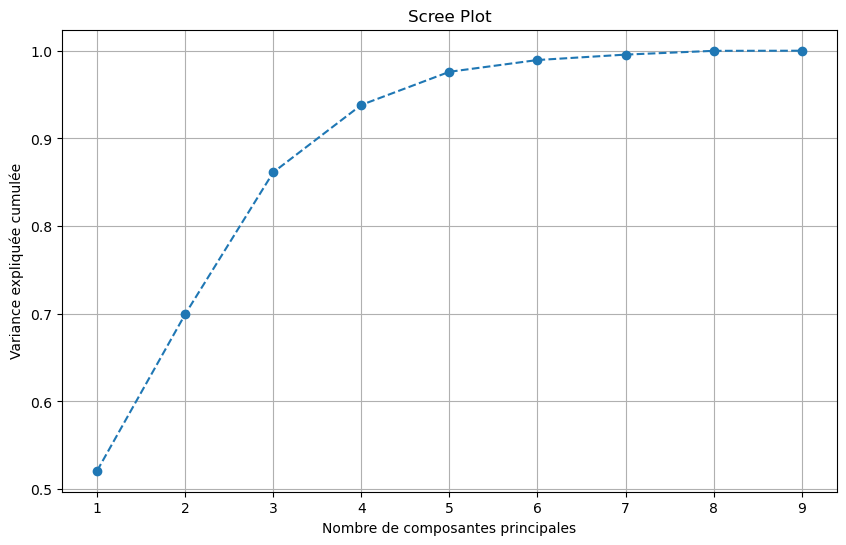

In [50]:
X3 = data3.select_dtypes(include='number')
std_scale3 = StandardScaler().fit(X3)
X3_scaled = std_scale3.transform(X3)

model3=PCA(n_components=9)
pca3=model3.fit_transform(X3)

pca3_df = pd.DataFrame(data=pca3, columns=[f'PC{i}' for i in range(1, 10)])

# Visualiser la variance expliquée
explained_variance_ratio3 = model3.explained_variance_ratio_
cumulative_variance_ratio3 = explained_variance_ratio3.cumsum()

# Afficher le scree plot pour décider du nombre de composantes principales à conserver
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio3) + 1), cumulative_variance_ratio3, marker='o', linestyle='--')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# C'est MIEUX 70% avec seulement 2 CP
# Le problème : j'ai drop des colonnes arbitrairement
# => Appliquons la méthode de MULTICOLLINEARITE

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif_scores=[variance_inflation_factor(data2.values,feature) for feature in range(len(data2.columns))]
for feature in range(len(data2.columns)):
    print(data2.columns[feature]," : VIF=",variance_inflation_factor(data2.values,feature))
  

FTHG  : VIF= 714.3362809176454
FTAG  : VIF= 284.68767722466396
HTHG  : VIF= 122.9703487532308
HTAG  : VIF= 104.6971175180584
HS  : VIF= 2954.878703601048
AS  : VIF= 1578.0582537325433
HST  : VIF= 926.1832102696302
AST  : VIF= 2328.8651370254834
HF  : VIF= 4141.8964574991605
AF  : VIF= 752.2529491633085
HC  : VIF= 363.1489302360829
AC  : VIF= 839.2346790400612
HY  : VIF= 1070.5637107556133
AY  : VIF= 1591.6572455279654
HR  : VIF= 13.225202369741066
AR  : VIF= 117.16708682286972
B365H  : VIF= 929.3297173090027
B365D  : VIF= 17406.301403840538
B365A  : VIF= 2582.353137621805


### La côte du match nul a une énorme multicollinéarité (elle est lié à tous le jeu de données)
### => on la drop

In [72]:
data2=data2.drop('B365D',axis=1)

### On répète jusqu'à avoir tous les VIF faible (~10)

In [74]:
for feature in range(len(data2.columns)):
    print(data2.columns[feature]," : VIF=",variance_inflation_factor(data2.values,feature))

FTHG  : VIF= 706.225514069027
FTAG  : VIF= 166.28318639194381
HTHG  : VIF= 122.78843827594571
HTAG  : VIF= 103.78590583319732
HS  : VIF= 1628.1408635442763
AS  : VIF= 1421.6818131886905
HST  : VIF= 893.8390745527173
AST  : VIF= 957.0068908003975
HF  : VIF= 2159.9327588333495
AF  : VIF= 751.5367611289913
HC  : VIF= 268.19443276681454
AC  : VIF= 422.0142783949999
HY  : VIF= 734.1122423526417
AY  : VIF= 1414.0045018888704
HR  : VIF= 12.901972817828618
AR  : VIF= 91.5045873339148
B365H  : VIF= 564.2136756972992
B365A  : VIF= 530.1044622616806


In [75]:
data2=data2.drop('HF',axis=1)
for feature in range(len(data2.columns)):
    print(data2.columns[feature]," : VIF=",variance_inflation_factor(data2.values,feature))

FTHG  : VIF= 452.0306554265626
FTAG  : VIF= 143.82540455356218
HTHG  : VIF= 94.73344595612939
HTAG  : VIF= 72.39861002743584
HS  : VIF= 1443.2679538386863
AS  : VIF= 1407.0344987390135
HST  : VIF= 539.0716581192634
AST  : VIF= 750.8064489129991
AF  : VIF= 748.7893923238139
HC  : VIF= 235.57337483395352
AC  : VIF= 339.59074360332994
HY  : VIF= 224.13176962346398
AY  : VIF= 882.1794341476415
HR  : VIF= 5.839120528175688
AR  : VIF= 56.02642794928674
B365H  : VIF= 490.9125333716248
B365A  : VIF= 477.2447994573124


In [76]:
data2=data2.drop('HS',axis=1)
for feature in range(len(data2.columns)):
    print(data2.columns[feature]," : VIF=",variance_inflation_factor(data2.values,feature))

FTHG  : VIF= 292.5255763402794
FTAG  : VIF= 110.93946238715219
HTHG  : VIF= 47.935270951916905
HTAG  : VIF= 69.55658749631637
AS  : VIF= 1402.249833837795
HST  : VIF= 284.884986675061
AST  : VIF= 747.8548547448057
AF  : VIF= 387.9144817330635
HC  : VIF= 88.57454197163412
AC  : VIF= 126.13403798231633
HY  : VIF= 212.5078287027177
AY  : VIF= 801.156711257232
HR  : VIF= 3.279618937926596
AR  : VIF= 56.02626407575596
B365H  : VIF= 182.498360684556
B365A  : VIF= 268.5509910619276


In [77]:
data2=data2.drop('AS',axis=1)
for feature in range(len(data2.columns)):
    print(data2.columns[feature]," : VIF=",variance_inflation_factor(data2.values,feature))

FTHG  : VIF= 89.5085688975406
FTAG  : VIF= 95.14426832595763
HTHG  : VIF= 34.64328731123298
HTAG  : VIF= 41.566366213903756
HST  : VIF= 185.05397338024198
AST  : VIF= 210.8308005611565
AF  : VIF= 322.59718444662514
HC  : VIF= 85.44898477739453
AC  : VIF= 123.85598811126299
HY  : VIF= 131.23149356999235
AY  : VIF= 423.9983214039674
HR  : VIF= 3.107404668973263
AR  : VIF= 35.22906306245929
B365H  : VIF= 131.24283758221648
B365A  : VIF= 148.6586593667815


In [78]:
data2=data2.drop('AY',axis=1)
for feature in range(len(data2.columns)):
    print(data2.columns[feature]," : VIF=",variance_inflation_factor(data2.values,feature))

FTHG  : VIF= 73.27636747665984
FTAG  : VIF= 80.35419450124223
HTHG  : VIF= 34.51322607795221
HTAG  : VIF= 38.53169550570763
HST  : VIF= 157.02631943606346
AST  : VIF= 208.03990439602813
AF  : VIF= 163.94849474996215
HC  : VIF= 78.79029979090707
AC  : VIF= 95.90388313173989
HY  : VIF= 76.32564815305865
HR  : VIF= 3.084859855481576
AR  : VIF= 11.68077745076398
B365H  : VIF= 131.20386546829639
B365A  : VIF= 115.91250922656029


In [79]:
data2=data2.drop('AST',axis=1)
for feature in range(len(data2.columns)):
    print(data2.columns[feature]," : VIF=",variance_inflation_factor(data2.values,feature))

FTHG  : VIF= 73.12343300286037
FTAG  : VIF= 58.6985834335189
HTHG  : VIF= 32.97703591792785
HTAG  : VIF= 37.767370574010016
HST  : VIF= 141.47754432470353
AF  : VIF= 132.3482146503752
HC  : VIF= 70.89930134317763
AC  : VIF= 78.33142987110016
HY  : VIF= 74.0531313827026
HR  : VIF= 3.0778208553806254
AR  : VIF= 10.564594708444478
B365H  : VIF= 119.98976126374467
B365A  : VIF= 112.05185218507233


In [80]:
data2=data2.drop('HST',axis=1)
for feature in range(len(data2.columns)):
    print(data2.columns[feature]," : VIF=",variance_inflation_factor(data2.values,feature))

FTHG  : VIF= 68.74934293657019
FTAG  : VIF= 58.2319522986321
HTHG  : VIF= 31.407497851853744
HTAG  : VIF= 37.688238496932705
AF  : VIF= 112.75004094130432
HC  : VIF= 62.136697735152254
AC  : VIF= 54.05621532592725
HY  : VIF= 71.89998190012288
HR  : VIF= 3.053700163305262
AR  : VIF= 10.197241707723673
B365H  : VIF= 111.83284976404575
B365A  : VIF= 107.15749087291856


In [81]:
data2=data2.drop('AF',axis=1)
for feature in range(len(data2.columns)):
    print(data2.columns[feature]," : VIF=",variance_inflation_factor(data2.values,feature))

FTHG  : VIF= 68.71554448108851
FTAG  : VIF= 58.1408640659741
HTHG  : VIF= 30.34432957676891
HTAG  : VIF= 37.02411024259067
HC  : VIF= 54.28507651351278
AC  : VIF= 53.20764430151212
HY  : VIF= 71.81026030342713
HR  : VIF= 2.982349944449729
AR  : VIF= 7.733559057558178
B365H  : VIF= 103.46016899224335
B365A  : VIF= 102.93384300884435


In [82]:
data2=data2.drop('B365H',axis=1)
for feature in range(len(data2.columns)):
    print(data2.columns[feature]," : VIF=",variance_inflation_factor(data2.values,feature))

FTHG  : VIF= 61.40201327457748
FTAG  : VIF= 53.741050931306326
HTHG  : VIF= 29.536076370619572
HTAG  : VIF= 36.64363391188425
HC  : VIF= 44.2972291234951
AC  : VIF= 32.650586302444964
HY  : VIF= 42.49935239033913
HR  : VIF= 2.898175383128282
AR  : VIF= 6.8815763646128225
B365A  : VIF= 46.09706886683208


# Voila, on réessaye le pca avec ces variables :

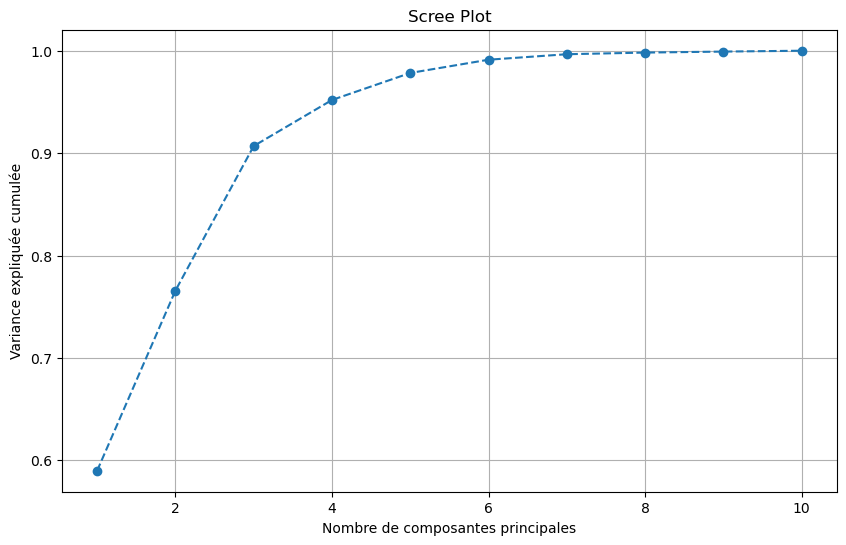

In [84]:
X2 = data2.select_dtypes(include='number')
std_scale2 = StandardScaler().fit(X2)
X2_scaled = std_scale2.transform(X2)

model2=PCA(n_components=10)
pca2=model2.fit_transform(X2)

pca2_df = pd.DataFrame(data=pca2, columns=[f'PC{i}' for i in range(1, 11)])

# Visualiser la variance expliquée
explained_variance_ratio2 = model2.explained_variance_ratio_
cumulative_variance_ratio2 = explained_variance_ratio2.cumsum()

# Afficher le scree plot pour décider du nombre de composantes principales à conserver
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio2) + 1), cumulative_variance_ratio2, marker='o', linestyle='--')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# 76% avec 2 CP!

## Biplot maintenant ?

In [94]:
PC1 = pca2[:,0]
PC2 = pca2[:,1]
ldngs = model2.components_

In [95]:
scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = data2.columns

Text(0.5, 1.0, 'Figure 1')

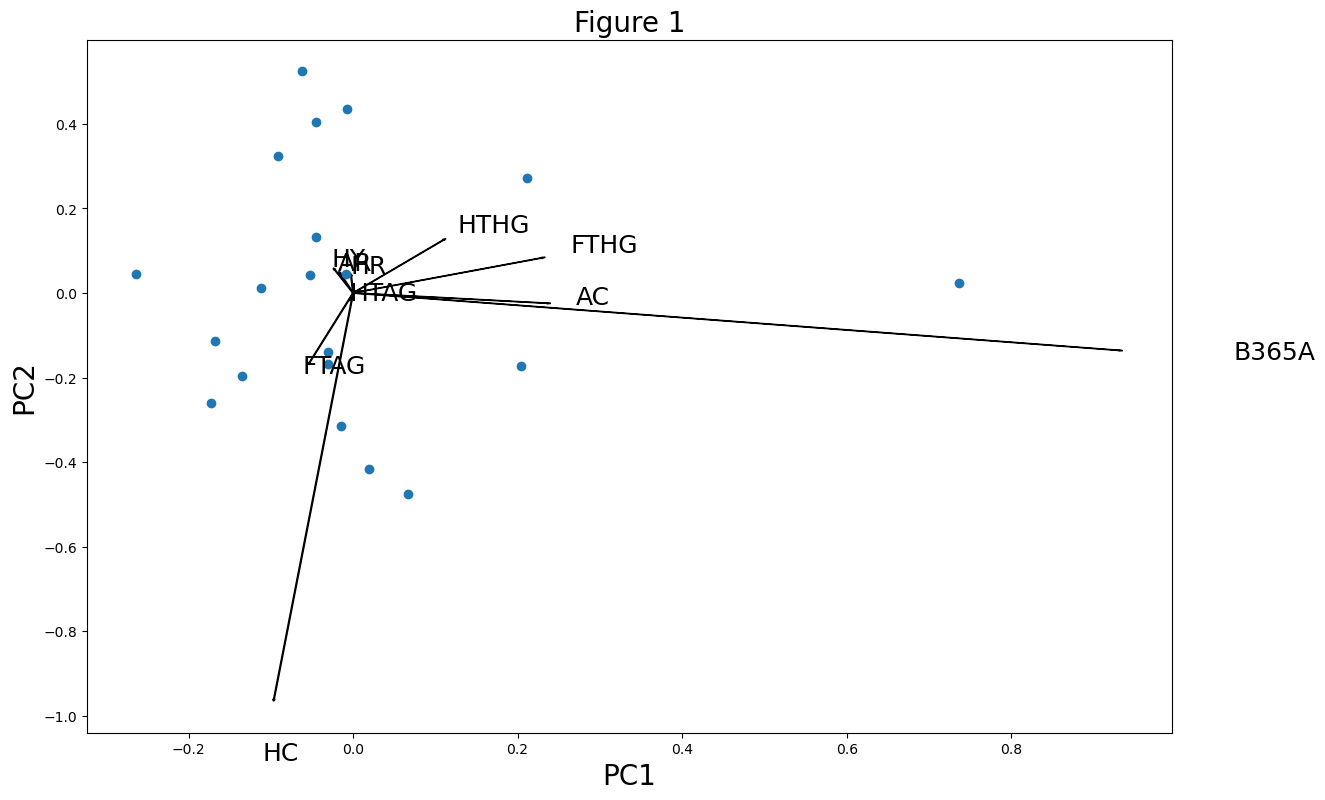

In [96]:
fig, ax = plt.subplots(figsize=(14, 9))
 
for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i])
    ax.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature, fontsize=18)
 
ax.scatter(PC1 * scalePC1,PC2 * scalePC2)
 
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Figure 1', fontsize=20)